In [ ]:
#MACD: The Moving Average Convergence Divergence indicator (MACD) is calculated using two exponential moving averages (EMA) - short term and long term. An exponential moving average of MACD is used as a signal line to indicate the upward or downward momentum. An exponential moving average is nothing but simply a moving average that gives more weightage to the recent data.

#So now we'll calculate the MACD with pandas-ta; it'll give us three columns, one is of the difference between the two EMA's called MACD and one is the EMA of MACD value called as Signal, and the last one is the difference between MACD & Signal called as MACD histogram.

In [86]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas_ta as ta
import pandas_datareader.data as web
from datetime import date


In [95]:
stocksabols=["FB"]
startdate=date(2021,6,2)
enddate=date.today()
stock=yf.download("FB",period="1y")

[*********************100%***********************]  1 of 1 completed


# MACD Calculation: 12 periodEMA - 26 period EMA
#THE STRATEGY : Buy when MACD crosses above the signal line
              : Sell when MACD crosses below the signal line 
    

In [46]:
stock.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-03,325.779999,327.380005,323.480011,326.040009,326.040009,12610800
2021-06-04,325.899994,332.459991,325.179993,330.350006,330.350006,13289400
2021-06-07,329.480011,337.690002,328.929993,336.579987,336.579987,20136700
2021-06-08,336.700012,338.299988,332.239990,333.679993,333.679993,14580500
2021-06-09,335.739990,336.799988,330.000000,330.250000,330.250000,13727900


<AxesSubplot:xlabel='Date'>

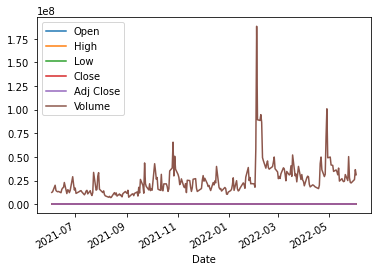

In [47]:
stock.plot()

<AxesSubplot:xlabel='Date'>

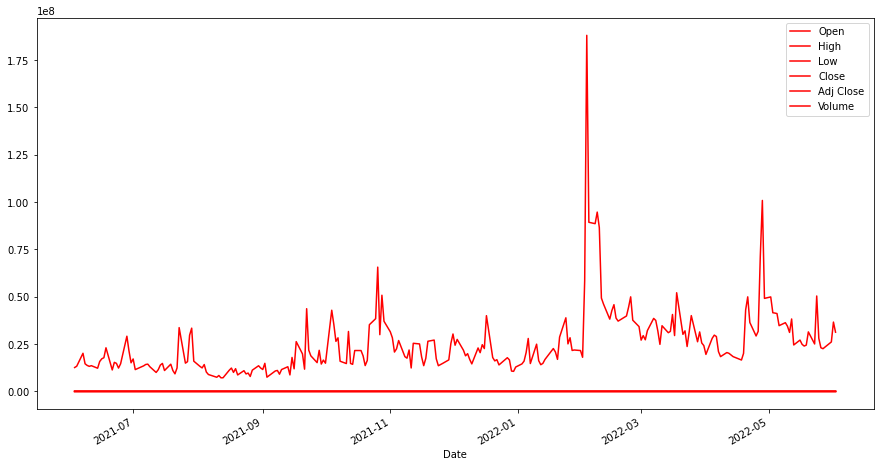

In [48]:
stock.plot(figsize=(15,8),color="red")

In [30]:
type(stock)

pandas.core.frame.DataFrame

In [31]:
stock1["Adj Close"].mean()

297.5179141788032

In [ ]:
#SMA: Just to begin with, we're going to use a very simple indicator first, which is the Simple Moving Averages; the concept for the same is very simple, we take an average of the Close Prices for a certain period to smoothen the trend & depict the general direction of the trend flow.

In [91]:
stock['SMA 30'] = ta.sma(stock['Close'],30)
stock['SMA 100'] = ta.sma(stock['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(stock):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(stock)):
        if stock['SMA 30'][i] > stock['SMA 100'][i]:
            if position == False :
                signalBuy.append(stock['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif stock['SMA 30'][i] < stock['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(stock['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])


In [92]:
stock

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100
Date,,,,,,,,
2021-06-03,325.779999,327.380005,323.480011,326.040009,326.040009,12610800,NaN,NaN
2021-06-04,325.899994,332.459991,325.179993,330.350006,330.350006,13289400,NaN,NaN
2021-06-07,329.480011,337.690002,328.929993,336.579987,336.579987,20136700,NaN,NaN
2021-06-08,336.700012,338.299988,332.239990,333.679993,333.679993,14580500,NaN,NaN
2021-06-09,335.739990,336.799988,330.000000,330.250000,330.250000,13727900,NaN,NaN
...,...,...,...,...,...,...,...,...
2022-05-27,191.360001,195.330002,189.800003,195.130005,195.130005,22562700,196.956000,229.439701
2022-05-31,194.889999,197.600006,192.009995,193.639999,193.639999,26131100,196.385000,228.134401
2022-06-01,196.509995,199.529999,185.000000,188.639999,188.639999,36623500,195.429333,226.696201


# OUTPUT
stock['Buy_Signal_price'], stock['Sell_Signal_price'] = buy_sell(stock)
stock


# VISUALIZATION:

KeyError: 'SMA 30'

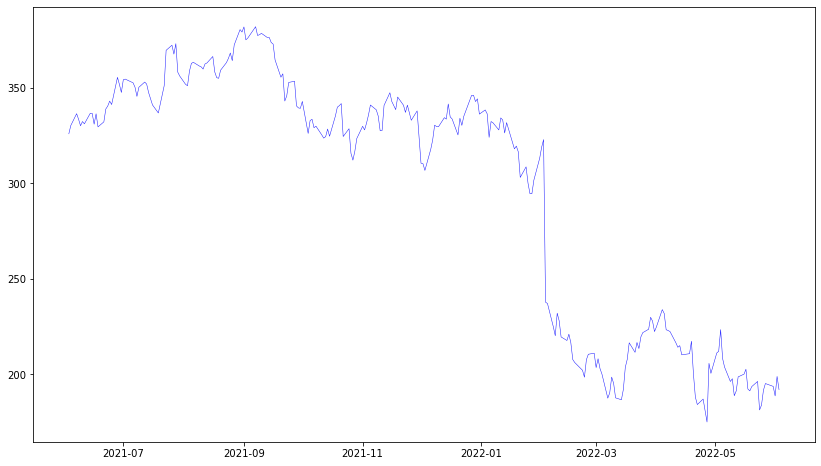

In [100]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(stock['Adj Close'] , label = "FB"[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(stock['SMA 30'], label = 'SMA 30', alpha = 0.85)
ax.plot(stock['SMA 100'], label = 'SMA 100' , alpha = 0.85)
ax.scatter(stock.index , stock['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(stock.index , stock['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title("FB"[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price usd ($)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()


In [101]:
macd = ta.macd(stock['Close'])
macd


,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2021-06-03,NaN,NaN,NaN
2021-06-04,NaN,NaN,NaN
2021-06-07,NaN,NaN,NaN
2021-06-08,NaN,NaN,NaN
2021-06-09,NaN,NaN,NaN
...,...,...,...
2022-05-27,-4.290711,0.000888,-4.291599
2022-05-31,-3.922360,0.295391,-4.217752
2022-06-01,-3.987928,0.183859,-4.171787


In [102]:
stock = pd.concat([stock, macd], axis=1).reindex(stock.index)
stock


,Open,High,Low,Close,Adj Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,
2021-06-03,325.779999,327.380005,323.480011,326.040009,326.040009,12610800,NaN,NaN,NaN
2021-06-04,325.899994,332.459991,325.179993,330.350006,330.350006,13289400,NaN,NaN,NaN
2021-06-07,329.480011,337.690002,328.929993,336.579987,336.579987,20136700,NaN,NaN,NaN
2021-06-08,336.700012,338.299988,332.239990,333.679993,333.679993,14580500,NaN,NaN,NaN
2021-06-09,335.739990,336.799988,330.000000,330.250000,330.250000,13727900,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-05-27,191.360001,195.330002,189.800003,195.130005,195.130005,22562700,-4.290711,0.000888,-4.291599
2022-05-31,194.889999,197.600006,192.009995,193.639999,193.639999,26131100,-3.922360,0.295391,-4.217752
2022-06-01,196.509995,199.529999,185.000000,188.639999,188.639999,36623500,-3.987928,0.183859,-4.171787


In [103]:
def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Adj Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    stock['MACD_Buy_Signal_price'] = MACD_Buy
    stock['MACD_Sell_Signal_price'] = MACD_Sell


In [106]:
MACD_strategy = MACD_Strategy(stock, 0.025)
MACD_strategy
stock.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price
Date,,,,,,,,,,,
2022-05-27,191.360001,195.330002,189.800003,195.130005,195.130005,22562700,-4.290711,0.000888,-4.291599,195.130005,NaN
2022-05-31,194.889999,197.600006,192.009995,193.639999,193.639999,26131100,-3.922360,0.295391,-4.217752,NaN,NaN
2022-06-01,196.509995,199.529999,185.000000,188.639999,188.639999,36623500,-3.987928,0.183859,-4.171787,NaN,NaN
2022-06-02,188.449997,200.940002,187.729996,198.860001,198.860001,31924200,-3.178581,0.794565,-3.973146,NaN,NaN
2022-06-03,195.979996,196.580002,190.585007,191.949997,191.949997,9633829,-3.059480,0.730933,-3.790412,NaN,NaN


In [113]:
def MACD_color(stock):
    MACD_color = []
    for i in range(0, len(stock)):
        if stock['MACDh_12_26_9'][i] > stock['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

stock['positive'] = MACD_color(stock)
stock


,Open,High,Low,Close,Adj Close,Volume,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Date,,,,,,,,,,,,
2021-06-03,325.779999,327.380005,323.480011,326.040009,326.040009,12610800,NaN,NaN,NaN,NaN,NaN,False
2021-06-04,325.899994,332.459991,325.179993,330.350006,330.350006,13289400,NaN,NaN,NaN,NaN,NaN,False
2021-06-07,329.480011,337.690002,328.929993,336.579987,336.579987,20136700,NaN,NaN,NaN,NaN,NaN,False
2021-06-08,336.700012,338.299988,332.239990,333.679993,333.679993,14580500,NaN,NaN,NaN,NaN,NaN,False
2021-06-09,335.739990,336.799988,330.000000,330.250000,330.250000,13727900,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-27,191.360001,195.330002,189.800003,195.130005,195.130005,22562700,-4.290711,0.000888,-4.291599,195.130005,NaN,True
2022-05-31,194.889999,197.600006,192.009995,193.639999,193.639999,26131100,-3.922360,0.295391,-4.217752,NaN,NaN,True
2022-06-01,196.509995,199.529999,185.000000,188.639999,188.639999,36623500,-3.987928,0.183859,-4.171787,NaN,NaN,False


NameError: name 'data' is not defined

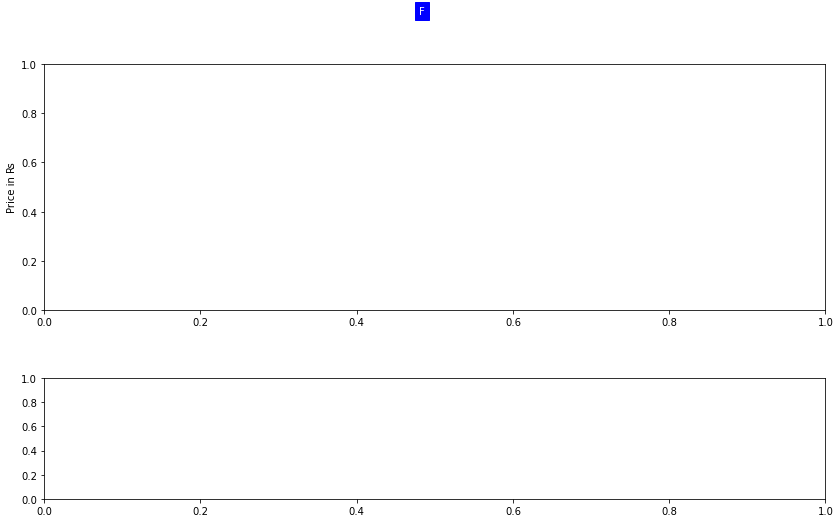

In [115]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle("FB"[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',stock=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(stock.index, stock['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(stock.index, stock['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=stock, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=stock, label='signal', linewidth=0.5, color='red')
ax2.bar(stock.index,'MACDh_12_26_9', data=stock, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()


In [ ]:
#SHORT TIME :CURRENT EMA12=2/12+1 + (surrent close-previous EMA12)+ previous EMA12
            # initial EMA12=SMA12(12 period close)
#LONG TIME : current EMA26 =2/26+1 +(current close-previous EMA12)+previous EMA12
           # initial EMA26= SMA26(26 periods close )
#MACD LINE: FAST LENGTH EMA - SLOW LENGTH EMA
 #MACD indicator calculation :
            # MACD(12,26)= EMA12(close)-EMA26(close)
#MACD stock technical indicator( 9 days indicator signal calculation)
            # signal(9): EMA9[MACD(12,26)]

    


In [80]:
np.where(stock)

(array([  0,   0,   0, ..., 203, 203, 203], dtype=int64),
 array([0, 1, 2, ..., 4, 5, 6], dtype=int64))

In [84]:
#IF MACD LINE>SIGNAL LINE=>BUY THE STOCK
#IF MACD LINE>MACD LINE=>SELL THE STOCK
stock["SHORT_GR_LONG"]=np.where(stock["EA-20"]>stock["EA-50"],1,
stock.tail(100)

SyntaxError: unexpected EOF while parsing (Temp/ipykernel_96980/2263757399.py, line 2)

[]

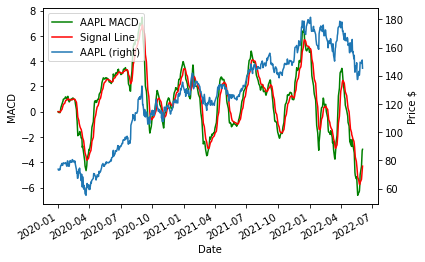

In [128]:
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
start = dt.datetime(2020, 1, 1)
end = dt.datetime.now()
ticker = pdr.get_data_yahoo("AAPL", start, end)['Adj Close']
exp1 = ticker.ewm(span=12, adjust=False).mean()
exp2 = ticker.ewm(span=26, adjust=False).mean()
macd = exp1 - exp2
exp3 = macd.ewm(span=9, adjust=False).mean()
macd.plot(label='AAPL MACD', color='g')
ax = exp3.plot(label='Signal Line', color='r')
ticker.plot(ax=ax, secondary_y=True, label='AAPL')
ax.set_ylabel('MACD')
ax.right_ax.set_ylabel('Price $')
ax.set_xlabel('Date')
lines = ax.get_lines() + ax.right_ax.get_lines()
ax.legend(lines, [l.get_label() for l in lines], loc='upper left')
plt.plot(figsize=(16,9))

In [ ]:
#MACD indicator histogram calculation
        # MACD Histogram (12,26,9)=MACD(12,26)-signal(9)
    